# Bibliotecas

In [1]:
!pip install nltk

In [3]:
!pip install wordcloud

In [4]:
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords
from matplotlib.colors import ListedColormap
from wordcloud import WordCloud
import string


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Adria\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Criação do corpus

- Corpus é uma coleção de documentos que queremos mineirar de alguma forma

In [6]:
corpus = PlaintextCorpusReader('../datasets/Arquivos', '.*', encoding = 'ISO-8859-1')

## Leitura dos arquivos do disco

- Percorrer os registros e mostrar o nome dos primeiros 100 arquivos

In [8]:
arquivos = corpus.fileids()
arquivos[0:10]

['1.txt',
 '10.txt',
 '100.txt',
 '1000.txt',
 '1001.txt',
 '1002.txt',
 '1003.txt',
 '1004.txt',
 '1005.txt',
 '1006.txt']

## Acessar o texto de um arquivo

- `corpus.raw(filename)` - ler um arquivo
- `corpus.raw()` - lê todos os arquivos

In [9]:
texto = corpus.raw('1.txt')
texto

"@relation 'Reuters-21578 Corn ModApte Train-weka.filters.unsupervised.attribute.NumericToBinary-weka.filters.unsupervised.instance.RemoveFolds-S0-N5-F1'\r\n"

In [17]:
textos = corpus.raw()

## Acessando as palavras dos documentos

In [12]:
palavras = corpus.words()
print(f'quantiade de palavras {len(palavras)}')

quantiade de palavras 619424


## Stopwords 

- a função `stopword.words('language')` importa as stopwords da linguagem especificada

In [14]:
stops = stopwords.words('portuguese')
print(stops)

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um', 'para', 'com', 'não', 'uma', 'os', 'no', 'se', 'na', 'por', 'mais', 'as', 'dos', 'como', 'mas', 'ao', 'ele', 'das', 'à', 'seu', 'sua', 'ou', 'quando', 'muito', 'nos', 'já', 'eu', 'também', 'só', 'pelo', 'pela', 'até', 'isso', 'ela', 'entre', 'depois', 'sem', 'mesmo', 'aos', 'seus', 'quem', 'nas', 'me', 'esse', 'eles', 'você', 'essa', 'num', 'nem', 'suas', 'meu', 'às', 'minha', 'numa', 'pelos', 'elas', 'qual', 'nós', 'lhe', 'deles', 'essas', 'esses', 'pelas', 'este', 'dele', 'tu', 'te', 'vocês', 'vos', 'lhes', 'meus', 'minhas', 'teu', 'tua', 'teus', 'tuas', 'nosso', 'nossa', 'nossos', 'nossas', 'dela', 'delas', 'esta', 'estes', 'estas', 'aquele', 'aquela', 'aqueles', 'aquelas', 'isto', 'aquilo', 'estou', 'está', 'estamos', 'estão', 'estive', 'esteve', 'estivemos', 'estiveram', 'estava', 'estávamos', 'estavam', 'estivera', 'estivéramos', 'esteja', 'estejamos', 'estejam', 'estivesse', 'estivéssemos', 'estivessem', 'estiver', 'estiv

In [15]:
stops = stopwords.words('english')
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Nuvens de palavras

- Paleta de cores `ListedColormap`

In [19]:
cores = ListedColormap(['orange', 'green', 'red', 'blue', 'yellow'])

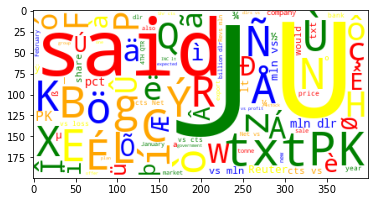

In [20]:
nuvem = WordCloud(
  background_color='white',
    colormap=cores,
    stopwords=stops,
    max_words=100
)

nuvem.generate(textos)
plt.imshow(nuvem)

## Remoção de Stopwords

In [21]:
palavras_semstop = [p for p in palavras if p not in stops]
len(palavras_semstop)

555712

## Remoção de Pontuação

In [23]:
palavras_sem_pontuacao = [p for p in palavras_semstop if p not in string.punctuation]
len(palavras_sem_pontuacao)

492087

## Calcular a frequência das palavras

In [27]:
freq = nltk.FreqDist(palavras_sem_pontuacao)
freq

FreqDist({'¸': 3886, 'said': 3398, '3': 2836, '0': 2728, 'mln': 2724, '1': 2321, 'vs': 2201, 'J': 2145, 'dlrs': 1946, '000': 1641, ...})

## Palavras mais comuns

In [29]:
comuns = freq.most_common(100)
print(comuns)

[('¸', 3886), ('said', 3398), ('3', 2836), ('0', 2728), ('mln', 2724), ('1', 2321), ('vs', 2201), ('J', 2145), ('dlrs', 1946), ('000', 1641), ('2', 1584), ('txtPK', 1558), ('&#', 1466), (";',", 1432), ('The', 1429), ('U', 1422), ('S', 1414), ('PK', 1397), ('cts', 1374), ('\x00\x00\x00', 1318), ('4', 1296), ('lt', 1288), ('5', 1274), ('Reuter', 1214), ('\x10', 1181), ('pct', 1147), ('6', 1117), ('\x00', 1117), ('8', 1111), ('\x0f', 1087), ('7', 1080), ('\x14', 1072), ('\x91', 1048), ('\x08', 1041), ('\x83', 1041), ('9', 1039), ('\x03', 1039), ('\x9e', 995), ('\x92', 993), ('÷', 991), ('\x06', 975), ('\x05', 967), ('\x8e', 963), ('¶', 962), ('\x1b', 962), ('\x90', 960), ('\x93', 960), ('\x18', 949), ('\x94', 945), ('\x07', 945), ('\x8b', 942), ('\x8d', 941), ('\x9a', 936), ('±', 933), ('\x0e', 929), ('ï', 924), ('A', 923), ('\x1a', 922), ('\x9d', 912), ('´', 911), ('\x16', 910), ('\x81', 910), ('»', 906), ('\x82', 906), ('\x9c', 898), ('\x9b', 897), ('¤', 897), ('°', 886), ('£', 886), ('